# Decision tree: titanic to predict survival
This notebook will explain wether or not a passenger could survive, using the titanic dataset. For this we will performed a decision tree analysis.

In [1]:
import machine_learning_fundamentals.utils.paths as path
import pandas as pd
import re
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns #to manage data
import numpy as np

%matplotlib inline
sns.set()

#### Getting the data

In [2]:
file_test = path.data_processed_dir('titanic-test.csv')
file_train = path.data_processed_dir('titanic-train.csv')

test_df = pd.read_csv(file_test)
train_df = pd.read_csv(file_train)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Viz about the survival distributions

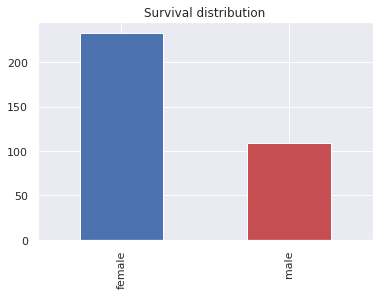

In [4]:
train_df[(train_df.Survived == 1)].Sex.value_counts().plot(kind='bar', color = ['b','r'])
plt.title('Survival distribution')
plt.show()

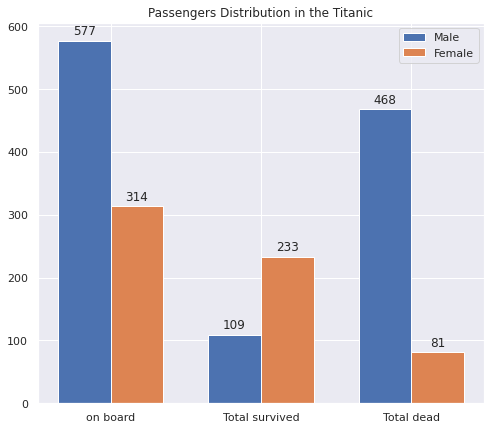

In [5]:
#data
labels = ['on board','Total survived', 'Total dead']

men_data = [train_df.Sex.value_counts()[0], train_df[(train_df.Survived == 1)].Sex.value_counts()[1],
            train_df[(train_df.Survived == 0)].Sex.value_counts()[0]]
women_data = [train_df.Sex.value_counts()[1], train_df[(train_df.Survived == 1)].Sex.value_counts()[0],
              train_df[(train_df.Survived == 0)].Sex.value_counts()[1]]

x = np.arange(len(labels))
width = 0.35
#graph
fig, ax = plt.subplots(figsize = (8,7))
rects1 = ax.bar(x-width/2, men_data, width, label='Male')  #male bar
rects2 = ax.bar(x+width/2, women_data, width, label='Female') #female bar

ax.set_title('Passengers Distribution in the Titanic')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
#function to put the numbers

def autolabel(rects):
    for i in rects:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom' )

autolabel(rects1)
autolabel(rects2)
plt.show()

In [6]:
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(train_df['Sex']) #transform textual to a numeric equivalent

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Processing the data
In this part we manage the null values, in the first case with the 'Age' variable where the null values where change with the median of the data. On the other hand, the 'Embarked' variable was replace with the 'S' because in a previous analysis was know that most of the passengers came from 'South Hampton' city.
1. **Chossing the predictors:** so we eliminate the variables that are not going to be useful for our analysis for this case we eliminate the following:

    1.1 PassengerId: because is an incremental value 

    1.2 Survived: is the varaible we want to predict

    1.3 Name: is not relevant the names of the person

    1.4 Ticket: also the ticket does not contribute
    
    1.5 Cabin: not relevant so far

2. **Categorical variables:** In this case the categorical variables for our model corresponce to: 'Sex' and 'Embarked' 
3. **Numerical variables:** For this case the numerical variables corresponde to: 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'

In [7]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median()) #replace null with the median
train_df['Embarked'] = train_df['Embarked'].fillna('S')  #replace null with S

In [21]:
train_predictors = train_df.drop(['PassengerId', 'Survived', 'Name','Ticket','Cabin'], axis=1) #remove the columns

#getting categorical variables
categorical_cols = [cname for cname in train_predictors.columns if 
                            train_predictors[cname].nunique() < 10 and
                            train_predictors[cname].dtype == 'object']

#numerical variables
numerical_cols = [cname for cname in train_predictors if
                        train_predictors[cname].dtype in ['int64','float64']]

In [22]:
numerical_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']